# ¡Hola, Pia!  

Mi nombre es Francisco Benavides, soy code reviewer de Tripleten y voy a revisar el proyecto que acabas de desarrollar.


Cada ves que vea un error por primera vez, lo señalaré. Deberás encontrarlo y arreglarlo, ya que buscamos que te prepares para un trabajo real, en el cual tu líder de equipo hará lo mismo. Si no puedes solucionar el error, te brindaré algunos tips más especificos la proxima vez.

Podrás encontrar mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer cuidadosamente cada una de tus implementaciones que has llevado a cabo para complir con tu informe. Cada uno de mis comentarios tiene el siguiente código de colores:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Si encuentras que es necesario, puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

Mucho éxito!

# Descripción del proyecto:

Rusty Bargain es un servicio de venta de coches de segunda mano que está desarrollando una app para atraer a nuevos clientes. Gracias a esa app, puedes averiguar rápidamente el valor de mercado de tu coche. Tienes acceso al historial, especificaciones técnicas, versiones de equipamiento y precios. Tienes que crear un modelo que determine el valor de mercado.

A Rusty Bargain le interesa:

- la calidad de la predicción
- la velocidad de la predicción
- el tiempo requerido para el entrenamiento

Instrucciones del proyecto:

Descarga y examina los datos.
Entrena diferentes modelos con varios hiperparámetros (debes hacer al menos dos modelos diferentes, pero más es mejor. 
Recuerda, varias implementaciones de potenciación del gradiente no cuentan como modelos diferentes). 
El punto principal de este paso es comparar métodos de potenciación del gradiente con bosque aleatorio, árbol de decisión y regresión lineal.
Analiza la velocidad y la calidad de los modelos.

Observaciones:

Utiliza la métrica RECM para evaluar los modelos.

La regresión lineal no es muy buena para el ajuste de hiperparámetros, pero es perfecta para hacer una prueba de cordura de otros métodos.

Si la potenciación del gradiente funciona peor que la regresión lineal, definitivamente algo salió mal.

Aprende por tu propia cuenta sobre la librería LightGBM y sus herramientas para crear modelos de potenciación del gradiente (gradient boosting).

Idealmente, tu proyecto debe tener regresión lineal para una prueba de cordura, un algoritmo basado en árbol con ajuste de hiperparámetros (preferiblemente, bosque aleatorio), LightGBM con ajuste de hiperparámetros (prueba un par de conjuntos), y CatBoost y XGBoost con ajuste de hiperparámetros (opcional).

Toma nota de la codificación de características categóricas para algoritmos simples. LightGBM y CatBoost tienen su implementación, pero XGBoost requiere OHE.

Puedes usar un comando especial para encontrar el tiempo de ejecución del código de celda en Jupyter Notebook. Encuentra ese comando.

Dado que el entrenamiento de un modelo de potenciación del gradiente puede llevar mucho tiempo, cambia solo algunos parámetros del modelo.

Si Jupyter Notebook deja de funcionar, elimina las variables excesivas por medio del operador del:

  del features_train
  
Descripción de los datos
El dataset está almacenado en el archivo /datasets/car_data.csv. descargar dataset.

Características

* DateCrawled — fecha en la que se descargó el perfil de la base de datos
* VehicleType — tipo de carrocería del vehículo
* RegistrationYear — año de matriculación del vehículo
* Gearbox — tipo de caja de cambios
* Power — potencia (CV)
* Model — modelo del vehículo
* Mileage — kilometraje (medido en km de acuerdo con las especificidades regionales del conjunto de datos)
* RegistrationMonth — mes de matriculación del vehículo
* FuelType — tipo de combustible
* Brand — marca del vehículo
* NotRepaired — vehículo con o sin reparación
* DateCreated — fecha de creación del perfil
* NumberOfPictures — número de fotos del vehículo
* PostalCode — código postal del propietario del perfil (usuario)
* LastSeen — fecha de la última vez que el usuario estuvo activo

Objetivo

Price — precio (en euros)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
**añadido**
    
Contexto del negocio?
</div>


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

Aqui puse el enunciado del proyecto, sus descripcion y requerimientos.

In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import catboost as cb
from xgboost import XGBRegressor
import time


In [2]:
# Cargar y explorar los datos
car_data = pd.read_csv('/datasets/car_data.csv')

# Explorar brevemente las columnas
print(car_data.info())
print(car_data.head())
print(car_data.describe())
missing_data = car_data.isnull().sum()
print(missing_data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

Se pudo identificar que existen columnas con valores nulos, VehicleType, Gearbox, Model , FuelType, NotRepaired.
Ademas se observa que los valores de las columnas RegistrationYear, Power a pesar que no son nulos tienen valores anomalos como años minimos de 1000 y maximos de 9999 lo cual no tiene logica y potencias de minimo 0 o maximos de 20000. Es necesario tratar estos datos , tanto los datos numericos como los categoricos.
Tambien se haran cambio de formato para las variables DateCrawled y LastSeen de acuerdo al tipo de dato que presentan.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
**solucionado**
    
Recuerda utilizar las rutas para ejecutar el proyecto en la plataforma o subir una ejecución limpia
</div>


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>
Hice el proyecto en mi entorno , lo subi y claro se queda con mi ruta del pc, pero ahora corregire aqui y tendra la ruta correcta

In [3]:
# Convertir columnas de fechas a formato datetime y limpiar columnas

# Convertir columnas de fechas a formato datetime
car_data['DateCrawled'] = pd.to_datetime(car_data['DateCrawled'], format='%d/%m/%Y %H:%M', errors='coerce')
car_data['LastSeen'] = pd.to_datetime(car_data['LastSeen'], format='%d/%m/%Y %H:%M', errors='coerce')


Es necesario revisar como se comportan las variables categoricas y las variables numericas para identificar su relacion y cuales son las que hay que trabajar.

Paso 1: Revisar relaciones de variables categoricas:

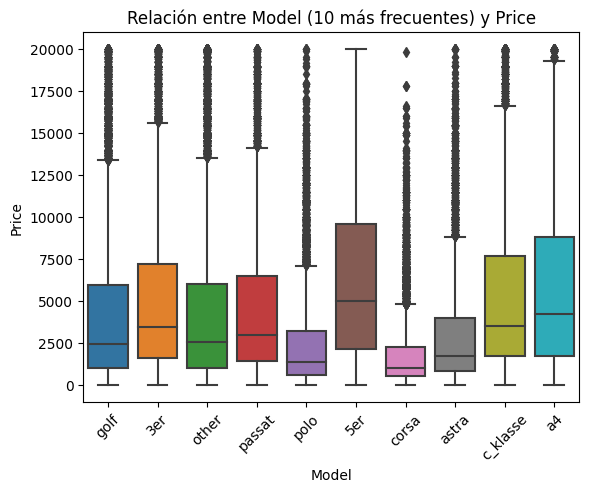

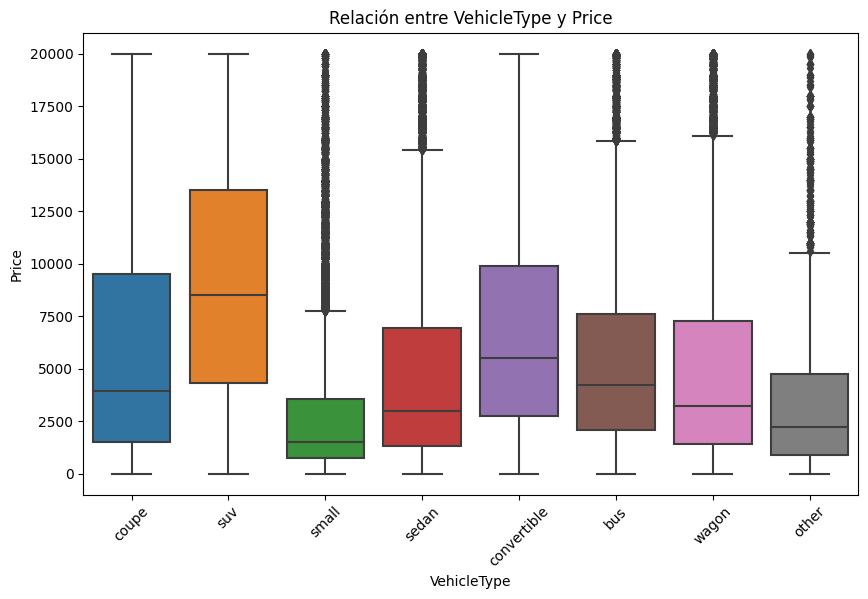

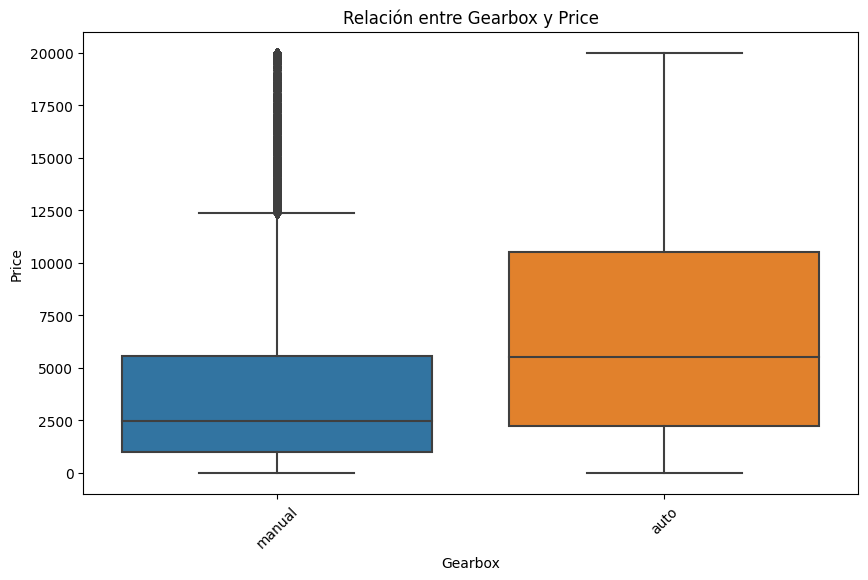

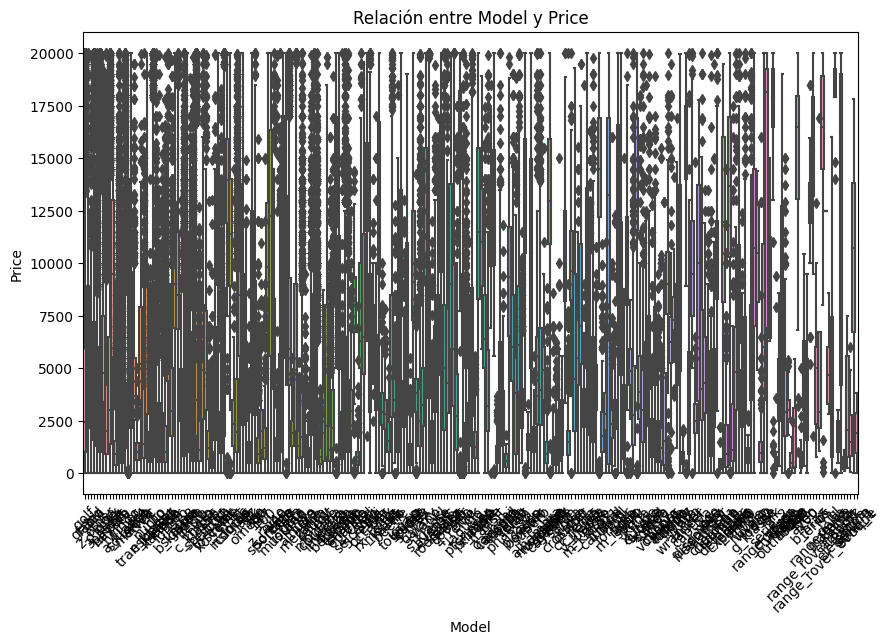

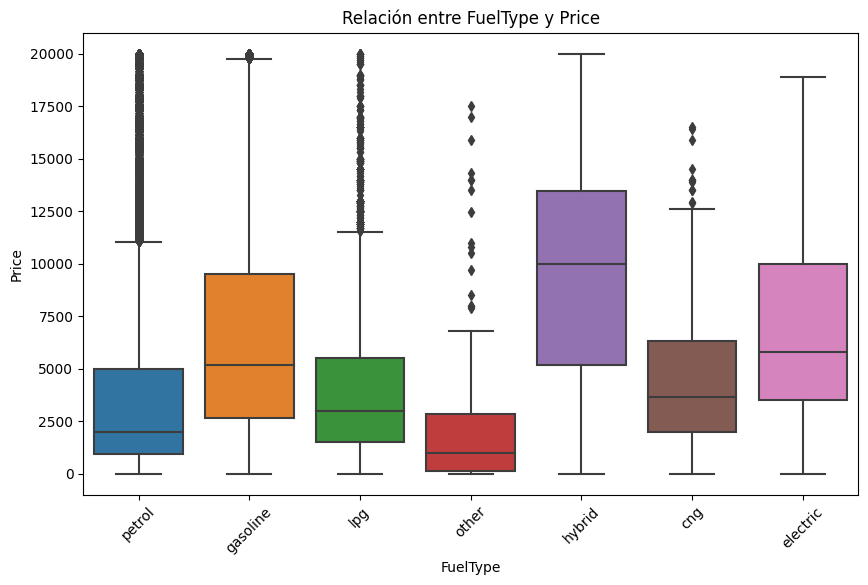

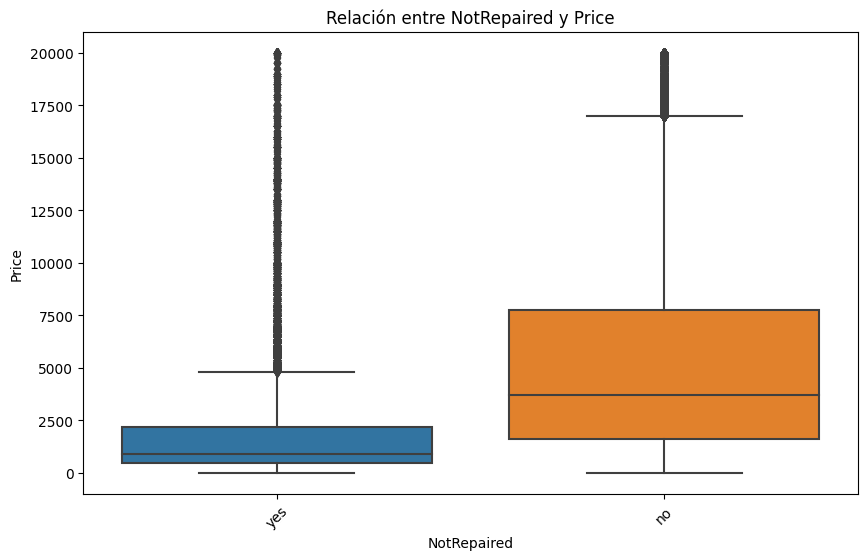

({'VehicleType': sedan          91457
  small          79831
  wagon          65166
  NaN            37490
  bus            28775
  convertible    20203
  coupe          16163
  suv            11996
  other           3288
  Name: VehicleType, dtype: int64,
  'Gearbox': manual    268251
  auto       66285
  NaN        19833
  Name: Gearbox, dtype: int64,
  'Model': golf                  29232
  other                 24421
  3er                   19761
  NaN                   19705
  polo                  13066
                        ...  
  serie_2                   8
  serie_3                   4
  rangerover                4
  range_rover_evoque        2
  serie_1                   2
  Name: Model, Length: 251, dtype: int64,
  'FuelType': petrol      216352
  gasoline     98720
  NaN          32895
  lpg           5310
  cng            565
  hybrid         233
  other          204
  electric        90
  Name: FuelType, dtype: int64,
  'NotRepaired': no     247161
  NaN     71154
  ye

In [4]:
# Identificar variables categóricas
categorical_columns = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'NotRepaired']

# Ver la distribución y los valores nulos en las columnas categóricas
distribution_info = {}

for column in categorical_columns:
    distribution_info[column] = car_data[column].value_counts(dropna=False)
    
# Visualizar el porcentaje de valores nulos por columna categórica
missing_data_categorical = car_data[categorical_columns].isnull().mean() * 100

# Filtrar los modelos más frecuentes antes de graficar
top_models = car_data['Model'].value_counts().nlargest(10).index
sns.boxplot(x='Model', y='Price', data=car_data[car_data['Model'].isin(top_models)])
plt.title('Relación entre Model (10 más frecuentes) y Price')
plt.xticks(rotation=45)
plt.show()

# Mostrar gráficos para evaluar las relaciones de las variables categóricas con 'Price'
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='Price', data=car_data)
    plt.title(f'Relación entre {column} y Price')
    plt.xticks(rotation=45)
    plt.show()

# Devolver la información de la distribución de las columnas categóricas y los valores nulos
distribution_info, missing_data_categorical

Después de ver las distribuciones, podemos decidir cómo imputar los valores faltantes:

'Model' y 'NotRepaired': Pueden imputarse como 'unknown', ya que no podemos hacer suposiciones basadas en otras columnas.

'VehicleType', 'Gearbox' y 'FuelType': Se pueden imputar con la moda basada en otras variables relevantes (por ejemplo, el modelo o la marca).

Paso 2: Limpieza e imputación de las variables categóricas

In [5]:
# Imputar 'Model' y 'NotRepaired' con 'unknown' ya que no podemos inferir fácilmente su valor
car_data['Model'].fillna('unknown', inplace=True)
car_data['NotRepaired'].fillna('unknown', inplace=True)

# Agrupar y calcular la moda por combinación de VehicleType, Model, y Brand
gearbox_mode = car_data.groupby(['VehicleType', 'Model', 'Brand'])['Gearbox'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
fueltype_mode = car_data.groupby(['VehicleType', 'Model', 'Brand'])['FuelType'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
vehicletype_mode = car_data.groupby(['Model', 'Brand'])['VehicleType'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)

# Calcular la moda global para fallback
global_mode_gearbox = car_data['Gearbox'].mode()[0]
global_mode_fueltype = car_data['FuelType'].mode()[0]
global_mode_vehicletype = car_data['VehicleType'].mode()[0]

# Imputar valores faltantes usando la moda por grupo
car_data['Gearbox'] = car_data.apply(lambda row: gearbox_mode.get((row['VehicleType'], row['Model'], row['Brand']), global_mode_gearbox) if pd.isnull(row['Gearbox']) else row['Gearbox'], axis=1)
car_data['FuelType'] = car_data.apply(lambda row: fueltype_mode.get((row['VehicleType'], row['Model'], row['Brand']), global_mode_fueltype) if pd.isnull(row['FuelType']) else row['FuelType'], axis=1)
car_data['VehicleType'] = car_data.apply(lambda row: vehicletype_mode.get((row['Model'], row['Brand']), global_mode_vehicletype) if pd.isnull(row['VehicleType']) else row['VehicleType'], axis=1)

# Verificar que no queden valores nulos
final_missing_data = car_data.isnull().sum()
print(final_missing_data)



DateCrawled           0
Price                 0
VehicleType           0
RegistrationYear      0
Gearbox              31
Power                 0
Model                 0
Mileage               0
RegistrationMonth     0
FuelType             45
Brand                 0
NotRepaired           0
DateCreated           0
NumberOfPictures      0
PostalCode            0
LastSeen              0
dtype: int64


Después de la imputación de las variables categóricas:

VehicleType, Model, y NotRepaired ya no tienen valores nulos.

Gearbox tiene 31 valores nulos restantes.

FuelType tiene 45 valores nulos restantes.

Se pueden imputar los valores nulos restantes en Gearbox y FuelType utilizando la moda global para asegurar que todas las variables categóricas queden sin valores faltantes.

In [6]:
# Imputar los valores faltantes restantes en Gearbox, FuelType y VehicleType con la moda global
car_data['Gearbox'].fillna(global_mode_gearbox, inplace=True)
car_data['FuelType'].fillna(global_mode_fueltype, inplace=True)
car_data['VehicleType'].fillna(global_mode_vehicletype, inplace=True)

# Verificar que no queden valores nulos
final_missing_data = car_data.isnull().sum()
print(final_missing_data)


DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Mileage              0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64


Paso 3: Análisis de variables numéricas

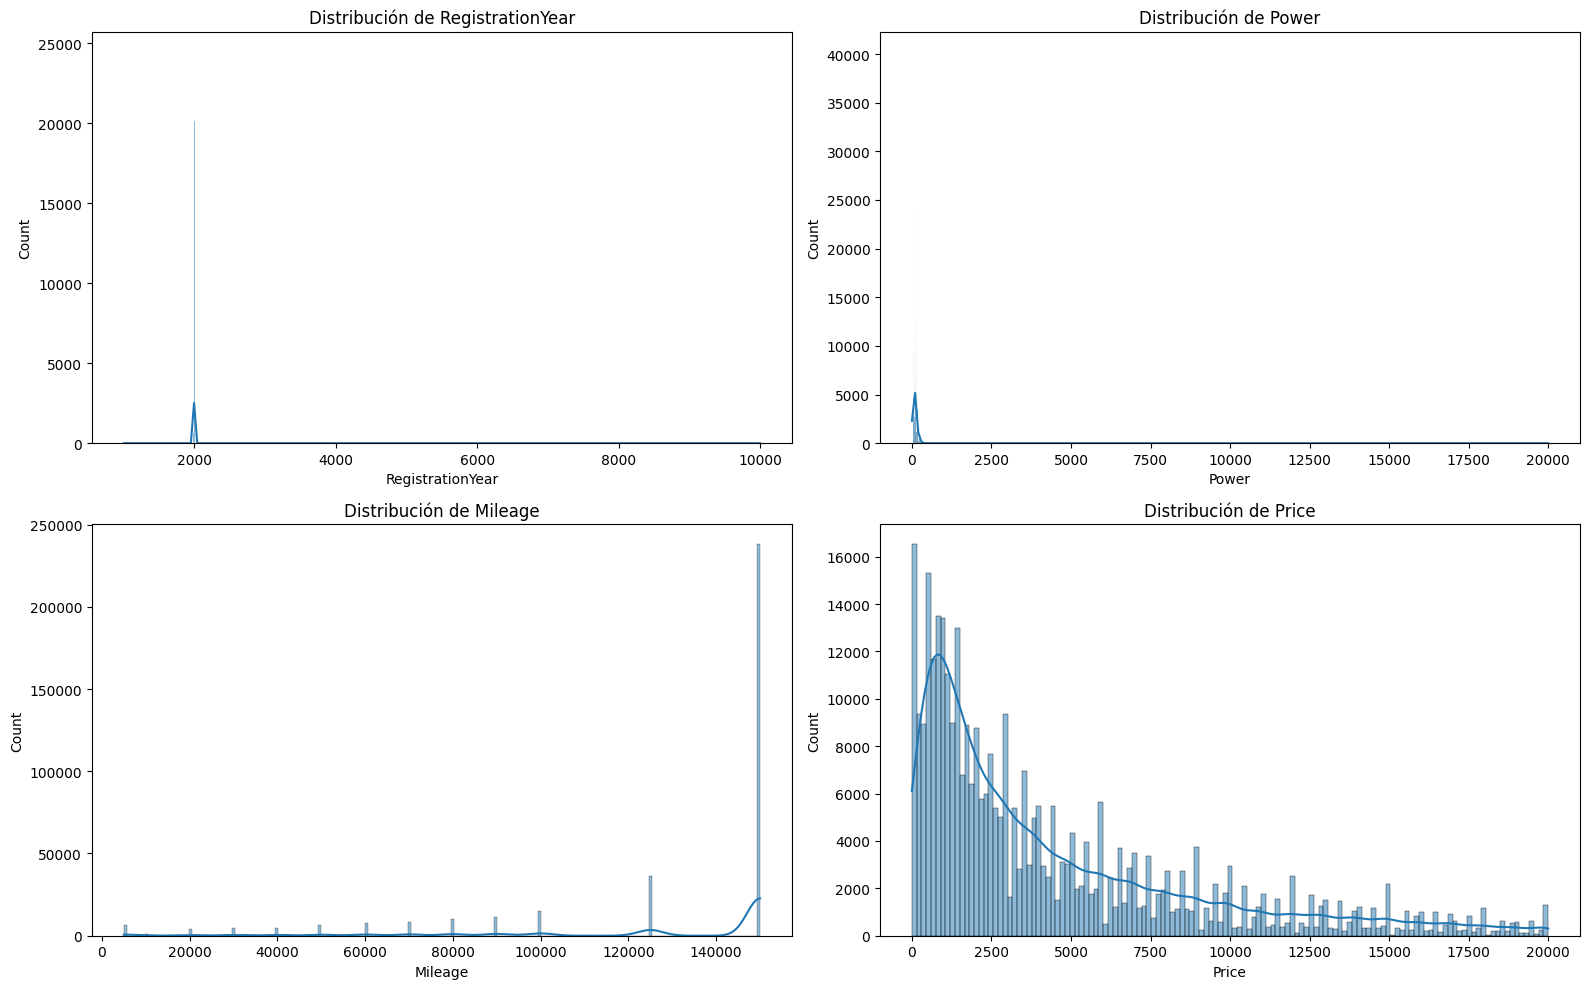

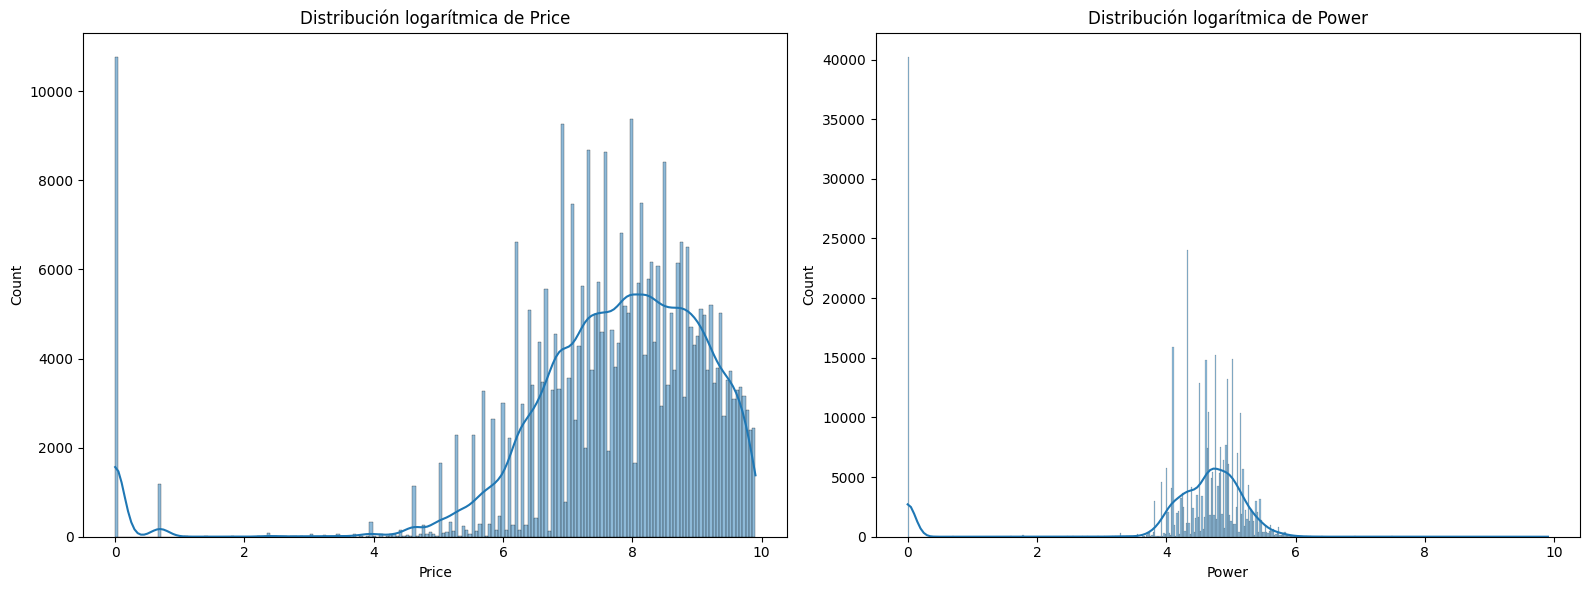

In [7]:
# Graficar la distribución de las variables numéricas
numerical_columns = ['RegistrationYear', 'Power', 'Mileage', 'Price']

plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)  # Crear subplots para las 4 variables numéricas
    sns.histplot(car_data[column], kde=True)
    plt.title(f'Distribución de {column}')
plt.tight_layout()
plt.show()

# Transformación logarítmica en Price y Power para una mejor visualización si es necesario
plt.figure(figsize=(16, 6))
for i, column in enumerate(['Price', 'Power'], 1):
    plt.subplot(1, 2, i)
    sns.histplot(np.log1p(car_data[column]), kde=True)
    plt.title(f'Distribución logarítmica de {column}')
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen analisis en general de la distribuciones de los datos
</div>


Paso 4: Limpieza e imputación de las variables numéricas

Considerando los valores que entrego discribe() mas el histograma obtenido con los resultados se puede ver que RegistrationYears presenta valores anomalos que es necesario corregir. Se consideran los datos de acuerdo al histograma desde el año 1900 al 2022

In [8]:
# Guardamos el número de filas antes de aplicar el filtro
original_row_count = car_data.shape[0]

# Aplicamos el filtro directamente al DataFrame original
car_data = car_data[(car_data['RegistrationYear'] >= 1900) & (car_data['RegistrationYear'] <= 2022)]

# Calculamos cuántas filas fueron eliminadas
filtered_row_count = car_data.shape[0]
rows_deleted = original_row_count - filtered_row_count
rows_deleted

171

Se consideran 171 filas eliminadas de acuerdo al rango de años filtrados, por lo que se encuentra una logica correcta de eliminacion ya que la cantidad de datos es baja.

De acuerdo a los valores de la columna power 

En esta columna hay muchos valores anomalos, de los cuales es necesario tratar , pero hay que considerar que hay varios modelos de vehiculos de los cuales puedes tener una gran potencia y algunos valores pueden corresponder a esos modelos.

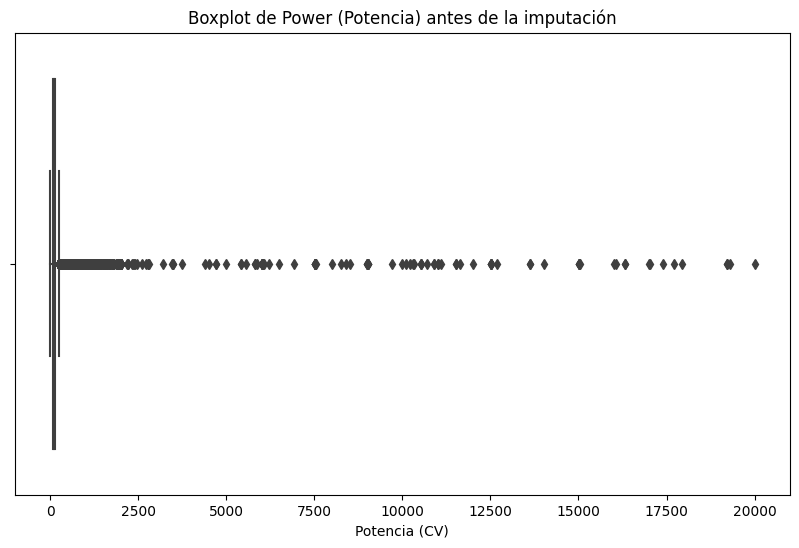

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=car_data['Power'])
plt.title('Boxplot de Power (Potencia) antes de la imputación')
plt.xlabel('Potencia (CV)')
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Este gráfico no te permite concluir nada por que tienes muchos outleirs, en regla general si un gráfico no te permite concluir nada es mejor removerlo
</div>


In [10]:
# Revisar los vehículos con potencia superior a 1000
high_power_cars = car_data[car_data['Power'] > 1000]
high_power_cars[['Model', 'Brand', 'Power']]

,Model,Brand,Power
1816,corolla,toyota,1398
2102,vectra,opel,1799
5328,astra,opel,1001
7661,lupo,volkswagen,7515
7720,unknown,honda,1400
...,...,...,...
348883,scenic,renault,1548
348968,ypsilon,lancia,1241
351947,zafira,opel,1001
353493,other,chrysler,2000


Mediana de Power antes de la imputación: 105.0
Desviación estándar de Power antes de la imputación: 189.53676560112444


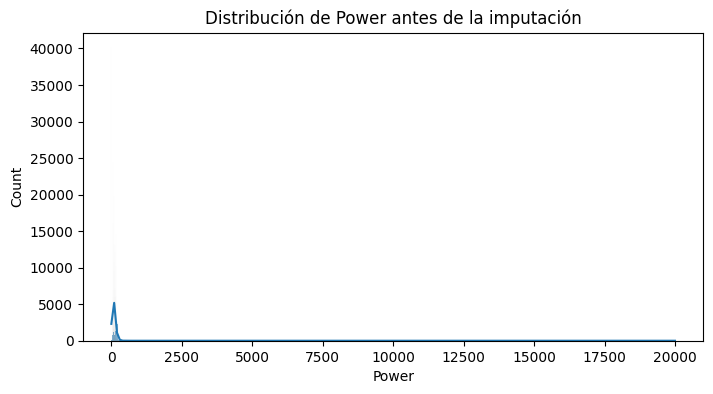

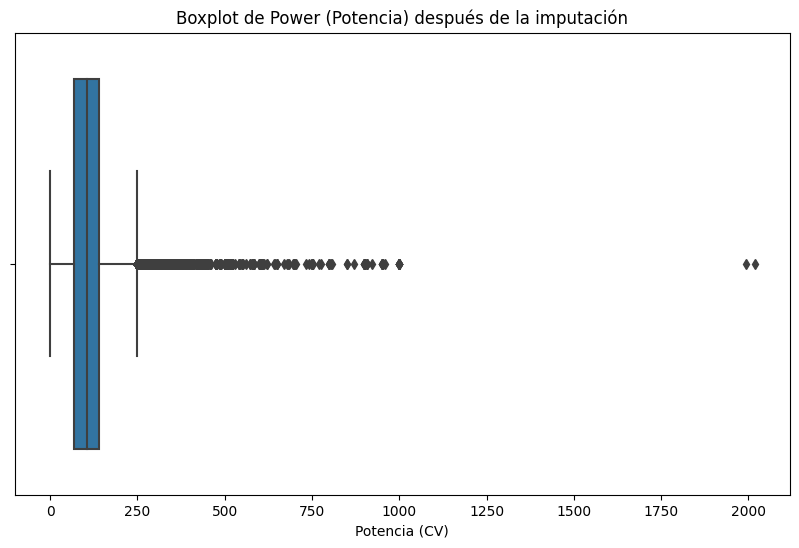

Mediana de Power después de la imputación: 105.0
Desviación estándar de Power después de la imputación: 64.39852963038575


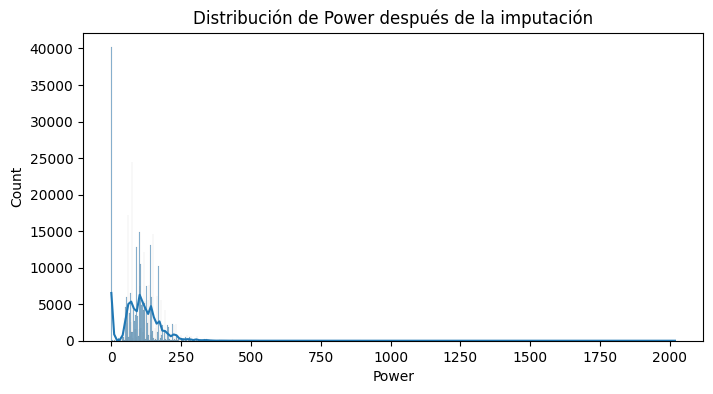

count    354198.000000
mean        106.675152
std          64.398530
min           0.000000
25%          69.000000
50%         105.000000
75%         141.000000
max        2018.000000
Name: Power, dtype: float64

In [11]:
# Calcular la mediana de 'Power' por tipo de vehículo, caja de cambios y modelo
power_medians = car_data.groupby(['VehicleType', 'Gearbox', 'Model'])['Power'].median()

# Mediana de Power antes de la imputación
initial_median_power = car_data['Power'].median()
print(f"Mediana de Power antes de la imputación: {initial_median_power}")

# Comparar la desviación estándar antes de la imputación
initial_std_power = car_data['Power'].std()
print(f"Desviación estándar de Power antes de la imputación: {initial_std_power}")

# Gráfico de la distribución de Power antes de la imputación
plt.figure(figsize=(8, 4))
sns.histplot(car_data['Power'], kde=True)
plt.title('Distribución de Power antes de la imputación')
plt.show()

# Función para imputar 'Power' (usando la mediana por grupo)
def impute_power(row):
    if row['Power'] > 1000:  # Solo aplicar a potencias mayores a 1000 (valores anómalos)
        key = (row['VehicleType'], row['Gearbox'], row['Model'])
        if key in power_medians.index:
            return power_medians.loc[key]  # Usar la mediana del grupo
        else:
            return car_data['Power'].median()  # Usar la mediana global si no hay mediana específica
    else:
        return row['Power']  # Dejar los valores correctos sin cambios

    
# Aplicar la imputación
car_data['Power'] = car_data.apply(impute_power, axis=1)

# Visualización final con un boxplot después de la imputación
plt.figure(figsize=(10, 6))
sns.boxplot(x=car_data['Power'])
plt.title('Boxplot de Power (Potencia) después de la imputación')
plt.xlabel('Potencia (CV)')
plt.show()

# Mediana de Power después de la imputación
final_median_power = car_data['Power'].median()
print(f"Mediana de Power después de la imputación: {final_median_power}")

# Comparar la desviación estándar después de la imputación
final_std_power = car_data['Power'].std()
print(f"Desviación estándar de Power después de la imputación: {final_std_power}")

# Gráfico de la distribución de Power después de la imputación
plt.figure(figsize=(8, 4))
sns.histplot(car_data['Power'], kde=True)
plt.title('Distribución de Power después de la imputación')
plt.show()

# Mostrar resumen estadístico después de la imputación
car_data['Power'].describe()


aun se ven valores anomalos a pesar de los datos de las medianas

In [12]:
# Contar cuántos valores anómalos quedan en la columna 'Power' después de la primera limpieza
# Consideramos anómalos aquellos valores mayores a 1000, ya que son poco representativos
remaining_anomalous_power = car_data[car_data['Power'] > 1000].shape[0]
remaining_anomalous_power

2

In [13]:
# Eliminar los vehículos con potencia superior a 1000
car_data_cleaned = car_data[car_data['Power'] <= 1000]

# Verificar cuántos registros se eliminaron
eliminados = car_data.shape[0] - car_data_cleaned.shape[0]
print(f"Cantidad de registros eliminados: {eliminados}")

Cantidad de registros eliminados: 2


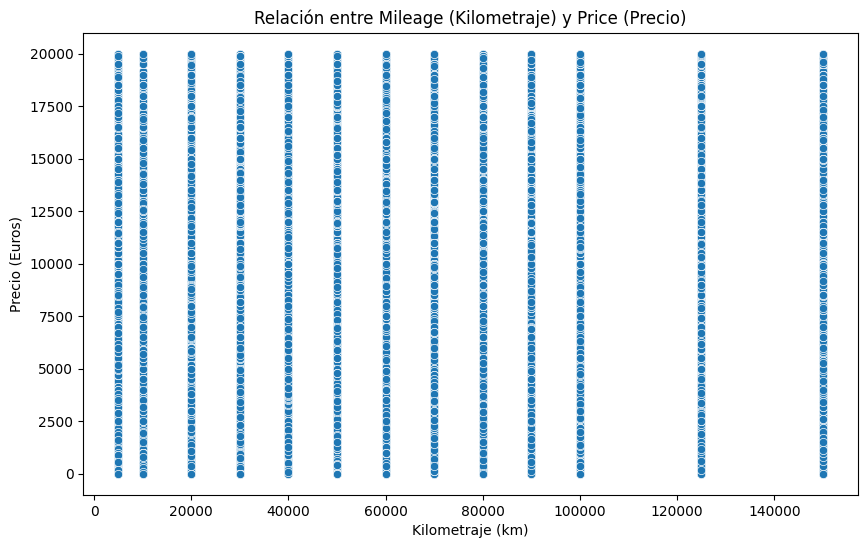

In [14]:
# Relación entre Mileage y Price (gráfico de dispersión)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage', y='Price', data=car_data)
plt.title('Relación entre Mileage (Kilometraje) y Price (Precio)')
plt.xlabel('Kilometraje (km)')
plt.ylabel('Precio (Euros)')
plt.show()

Relación entre Mileage y Price:

La relación entre el kilometraje y el precio muestra una tendencia descendente. Los coches con mayor kilometraje tienden a tener precios más bajos, lo cual es lógico, ya que el desgaste del coche aumenta con el kilometraje.
Sin embargo, también se observan algunos puntos fuera de la tendencia, lo que sugiere que algunos vehículos mantienen precios altos a pesar de un kilometraje elevado, posiblemente debido a otros factores como la marca, modelo, o el estado general del coche.

In [15]:
#Verificación final de la limpieza de los datos

car_data.describe(), car_data.isnull().sum()

(               Price  RegistrationYear          Power        Mileage  \
 count  354198.000000     354198.000000  354198.000000  354198.000000   
 mean     4417.651314       2003.084789     106.675152  128267.607383   
 std      4514.081022          7.536418      64.398530   37823.538557   
 min         0.000000       1910.000000       0.000000    5000.000000   
 25%      1050.000000       1999.000000      69.000000  125000.000000   
 50%      2700.000000       2003.000000     105.000000  150000.000000   
 75%      6400.000000       2008.000000     141.000000  150000.000000   
 max     20000.000000       2019.000000    2018.000000  150000.000000   
 
        RegistrationMonth  NumberOfPictures     PostalCode  
 count      354198.000000          354198.0  354198.000000  
 mean            5.716819               0.0   50511.793813  
 std             3.725539               0.0   25783.464340  
 min             0.000000               0.0    1067.000000  
 25%             3.000000           

Debemos considerar las siguientes columnas por sus características importantes para la predicción:

- VehicleType: El tipo de carrocería del vehículo (sedán, coupe, suv, etc.) tiene un impacto directo en el valor del coche.
- RegistrationYear: El año de matriculación es crucial para estimar la antigüedad del coche, lo que influye en su precio.
- Gearbox: El tipo de caja de cambios (manual o automática) es una característica técnica importante.
- Power: La potencia del vehículo (CV) está directamente relacionada con el rendimiento y, por tanto, el precio.
- Model: El modelo del coche es fundamental para determinar su valor de mercado.
- Mileage: El kilometraje representa el desgaste del vehículo y afecta su precio.
- FuelType: El tipo de combustible puede influir en el valor, ya que ciertos combustibles (como eléctrico o híbrido) pueden ser más valorados.
- Brand: La marca del coche tiene un impacto significativo en el precio.
- NotRepaired: Si el coche ha sido reparado o no, también es relevante para su valor.
- Price: Este es el objetivo que estamos prediciendo, por lo tanto, lo mantendremos en el dataset.

Columnas que podemos descartar:
- DateCrawled: No tiene relevancia directa para la predicción del precio.
- DateCreated: Similar a DateCrawled, no afecta el precio del coche.
- NumberOfPictures: No influye en el valor del coche.
- PostalCode: No se utilizará porque no agrega valor al modelo de predicción.
- RegistrationMonth: Aunque el mes puede afectar el valor, lo consideramos menos relevante que el año de matriculación.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
**solucionado**
    
Analisis de distribuciones de las variables numericas? como se relacionan con la variable target?, utilizaremos todas las columnas disponibles en el modelo?
</div>


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>
Analisis de distribuciones realizado tanto para variables categoricas y numericas, cambio de formato de variables correspondiente y decision de que variables se ocuparan para el modelo. Se creara un nueva dataset solo con las variables necesarias 

In [16]:
# Crear un nuevo dataset solo con las columnas seleccionadas
selected_columns = ['VehicleType', 'RegistrationYear', 'Gearbox', 'Power', 'Model', 'Mileage', 'FuelType', 'Brand', 'NotRepaired', 'Price']
car_data_cleaned = car_data[selected_columns]

# Verificar el nuevo dataset
print(car_data_cleaned.info())
print(car_data_cleaned.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354198 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   VehicleType       354198 non-null  object 
 1   RegistrationYear  354198 non-null  int64  
 2   Gearbox           354198 non-null  object 
 3   Power             354198 non-null  float64
 4   Model             354198 non-null  object 
 5   Mileage           354198 non-null  int64  
 6   FuelType          354198 non-null  object 
 7   Brand             354198 non-null  object 
 8   NotRepaired       354198 non-null  object 
 9   Price             354198 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 29.7+ MB
None
  VehicleType  RegistrationYear Gearbox  Power    Model  Mileage  FuelType  \
0       sedan              1993  manual    0.0     golf   150000    petrol   
1       coupe              2011  manual  190.0  unknown   125000  gasoline   
2         s

Paso 1: Codificación de variables categóricas
Las columnas categóricas deben ser transformadas a un formato numérico. Usare One-Hot Encoding (OHE) para las variables categóricas, ya que este método es efectivo en la mayoría de los casos con variables que no tienen un orden implícito.

In [17]:
# Aplicar One-Hot Encoding a las variables categóricas (excepto LightGBM y CatBoost)
categorical_columns = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']
car_data_encoded = pd.get_dummies(car_data_cleaned, drop_first=True)

# Verificar las primeras filas para comprobar la codificación
print(car_data_encoded.head())


   RegistrationYear  Power  Mileage  Price  VehicleType_convertible  \
0              1993    0.0   150000    480                        0   
1              2011  190.0   125000  18300                        0   
2              2004  163.0   125000   9800                        0   
3              2001   75.0   150000   1500                        0   
4              2008   69.0    90000   3600                        0   

   VehicleType_coupe  VehicleType_other  VehicleType_sedan  VehicleType_small  \
0                  0                  0                  1                  0   
1                  1                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  1   
4                  0                  0                  0                  1   

   VehicleType_suv  ...  Brand_smart  Brand_sonstige_autos  Brand_subaru  \
0         

Paso 2: División del dataset en entrenamiento y prueba
Ahora que tenemos las variables categóricas codificadas, vamos a dividir el dataset en dos conjuntos:

Entrenamiento: Para entrenar los modelos.
Prueba: Para evaluar el rendimiento de los modelos.
Dividiremos los datos usando una proporción del 80% para el entrenamiento y 20% para la prueba.

In [18]:
# Definir las características (features) y la variable objetivo (target)
X = car_data_encoded.drop('Price', axis=1)  # Todas las columnas excepto 'Price'
y = car_data_encoded['Price']  # La columna 'Price' es nuestro objetivo

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos de datos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (283358, 308)
Tamaño del conjunto de prueba: (70840, 308)


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Bien realizado el proceso de los datos para el modelo
</div>

Paso 3: Entrenamiento y mejora de los modelo

En este paso, entrenamos varios modelos para predecir el precio del coche, utilizando tanto técnicas básicas como avanzadas. Implementamos optimizaciones de hiperparámetros y consideramos tanto la precisión del modelo (RMSE) como el tiempo de entrenamiento.

Regresión Lineal: Usada como modelo base y referencia. Aunque su precisión no es la más alta, es útil para pruebas rápidas y como punto de partida para comparar el rendimiento de otros modelos más complejos.

Árbol de Decisión: Un modelo basado en reglas secuenciales. Es fácil de interpretar y rápido de entrenar, aunque tiende a sobreajustarse si no se optimizan adecuadamente los hiperparámetros. En este proyecto, ajustamos el árbol para encontrar un buen equilibrio entre precisión y tiempo de ejecución.

Bosque Aleatorio: Un conjunto de árboles de decisión, conocido por su robustez y capacidad de generalización. Realizamos una búsqueda de hiperparámetros optimizada utilizando RandomizedSearchCV para equilibrar el rendimiento y el tiempo de ejecución, dado que un ajuste más exhaustivo con GridSearchCV tomó demasiado tiempo. Además, limitamos los hiperparámetros y ajustamos el número de validaciones cruzadas para mejorar la eficiencia.

LightGBM: Un modelo de potenciación del gradiente que se caracteriza por su eficiencia tanto en tiempo de entrenamiento como en precisión. A diferencia de los modelos basados en árboles como el bosque aleatorio, LightGBM es muy adecuado para trabajar con datasets grandes y manejar directamente las variables categóricas sin necesidad de aplicar codificación one-hot.

CatBoost: Otro modelo de potenciación del gradiente, optimizado para datos categóricos. En este proyecto, se incluyó para comparar su desempeño frente a LightGBM y XGBoost, especialmente en términos de precisión y manejo de variables categóricas sin codificación.

XGBoost: Un modelo de potenciación del gradiente muy popular, conocido por su capacidad de ajuste y alto rendimiento. Similar a LightGBM, ofrece una gran precisión y tiempos de entrenamiento competitivos, pero puede ser un poco más lento en algunos casos debido a la complejidad del ajuste de sus hiperparámetros.


In [19]:
# Modelo 1: Regresión Lineal (sin ajuste de hiperparámetros)  

# Entrenar Modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_linear = linear_model.predict(X_test)

# Evaluar el modelo con RMSE
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print(f"RMSE del modelo de regresión lineal: {rmse_linear}")



RMSE del modelo de regresión lineal: 2847.8665193168886


In [20]:
# Modelo 2: Árbol de decisión (con ajuste de hiperparámetros usando GridSearchCV)

# Definir el modelo de Árbol de Decisión
tree_model = DecisionTreeRegressor(random_state=42)

# Definir los hiperparámetros que queremos ajustar
param_grid_tree = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

# Realizar la búsqueda de hiperparámetros con GridSearchCV
grid_search_tree = GridSearchCV(tree_model, param_grid_tree, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search_tree.fit(X_train, y_train)

# Obtener el mejor modelo
best_tree_model = grid_search_tree.best_estimator_

# Predecir en el conjunto de prueba
y_pred_tree = best_tree_model.predict(X_test)

# Evaluar el modelo con RMSE
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
print(f"RMSE del modelo de Árbol de Decisión: {rmse_tree}")



RMSE del modelo de Árbol de Decisión: 1957.571813985119


In [21]:
# Modelo 3: Bosque aleatorio 

# Definir el modelo de Bosque Aleatorio
forest_model = RandomForestRegressor(random_state=42)

# Definir más combinaciones de hiperparámetros (manteniéndolos limitados para un tiempo razonable)
param_grid_forest = {
    'n_estimators': [50, 100],  # Dos opciones
    'max_depth': [10, 20],      # Dos opciones
    'min_samples_split': [2, 5] # Dos opciones
}

# Realizar la búsqueda aleatoria de hiperparámetros con RandomizedSearchCV, limitando el número de iteraciones
random_search_forest = RandomizedSearchCV(forest_model, param_distributions=param_grid_forest, 
                                          n_iter=5, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, random_state=42)

# Ajustar el modelo
random_search_forest.fit(X_train, y_train)

# Obtener el mejor modelo
best_forest_model = random_search_forest.best_estimator_

# Predecir en el conjunto de prueba
y_pred_forest = best_forest_model.predict(X_test)

# Evaluar el modelo con RMSE
rmse_forest = np.sqrt(mean_squared_error(y_test, y_pred_forest))
print(f"RMSE del modelo de Bosque Aleatorio: {rmse_forest}")
print(f"Mejores hiperparámetros encontrados: {random_search_forest.best_params_}")


RMSE del modelo de Bosque Aleatorio: 1758.591981317762
Mejores hiperparámetros encontrados: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 20}


In [22]:
# Modelo 4: LightGBM (con ajuste de hiperparámetros usando GridSearchCV)

# Definir el modelo LightGBM
lightgbm_model = LGBMRegressor(random_state=42)

# Definir los hiperparámetros a ajustar
param_grid_lgbm = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [10, 20]
}

# Realizar la búsqueda de hiperparámetros con GridSearchCV
grid_search_lgbm = GridSearchCV(lightgbm_model, param_grid_lgbm, cv=3, n_jobs=-1)
grid_search_lgbm.fit(X_train, y_train)

# Obtener el mejor modelo
best_lgbm_model = grid_search_lgbm.best_estimator_

# Predecir en el conjunto de prueba
y_pred_lgbm = best_lgbm_model.predict(X_test)

# Evaluar el modelo con RMSE
rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))
print(f"RMSE del modelo LightGBM: {rmse_lgbm}")


RMSE del modelo LightGBM: 1803.521147883436


In [23]:
# Modelo 5: CatBoost (manejo automático de hiperparámetros)

# Definir el modelo CatBoost
catboost_model = cb.CatBoostRegressor(verbose=0, random_state=42)

# Entrenar el modelo CatBoost directamente (ajuste automático de hiperparámetros)
catboost_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_catboost = catboost_model.predict(X_test)

# Evaluar el modelo con RMSE
rmse_catboost = np.sqrt(mean_squared_error(y_test, y_pred_catboost))
print(f"RMSE del modelo CatBoost: {rmse_catboost}")


RMSE del modelo CatBoost: 1766.0221826309494


In [24]:
# Modelo 6: XGBoost

# Definir el modelo XGBoost
xgboost_model = XGBRegressor(random_state=42)

# Entrenar el modelo XGBoost
xgboost_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_xgboost = xgboost_model.predict(X_test)

# Evaluar el modelo con RMSE
rmse_xgboost = np.sqrt(mean_squared_error(y_test, y_pred_xgboost))
print(f"RMSE del modelo XGBoost: {rmse_xgboost}")


RMSE del modelo XGBoost: 1809.016154488547


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente el proceso de entrenar los modelos
</div>

Paso 4: Comparación de los modelos

Ahora que hemos entrenado todos los modelos, vamos a comparar sus resultados en términos de calidad de predicción (RMSE) y tiempo de entrenamiento. El RMSE ya lo hemos calculado en los pasos anteriores, y ahora vamos a consolidar los resultados en una tabla para una mejor visualización.

               Model         RMSE
0  Linear Regression  2847.866519
1      Decision Tree  1957.571814
2      Random Forest  1758.591981
3           LightGBM  1803.521148
4           CatBoost  1766.022183
5            XGBoost  1809.016154


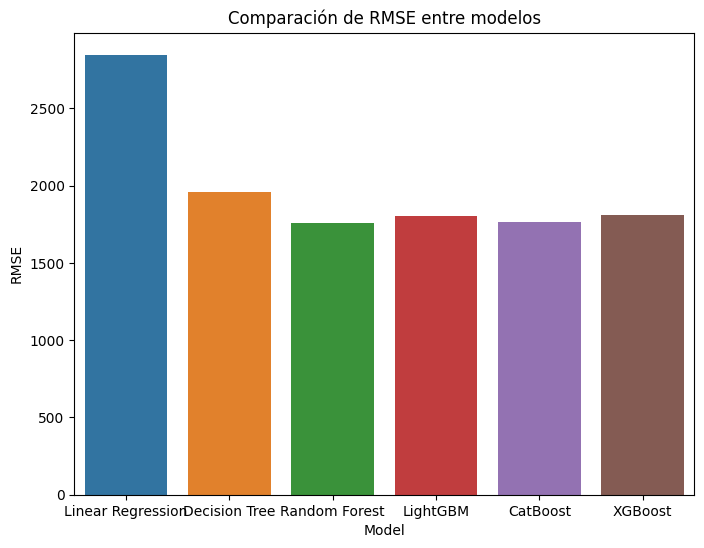

In [25]:
# Consolidar los RMSE de los modelos en un diccionario
rmse_results = {
    'Linear Regression': rmse_linear,
    'Decision Tree': rmse_tree,
    'Random Forest': rmse_forest,
    'LightGBM': rmse_lgbm,
    'CatBoost': rmse_catboost,
    'XGBoost': rmse_xgboost
}

# Convertir los resultados en un DataFrame para mejor visualización
rmse_df = pd.DataFrame(list(rmse_results.items()), columns=['Model', 'RMSE'])

# Mostrar los resultados de RMSE
print(rmse_df)

# Graficar los resultados de RMSE para comparar
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='RMSE', data=rmse_df)
plt.title('Comparación de RMSE entre modelos')
plt.ylabel('RMSE')
plt.show()



Paso 5: Medición del tiempo de entrenamiento
Además de la calidad de predicción (RMSE), también evaluaremos el tiempo de entrenamiento de cada modelo, ya que uno de los requerimientos del proyecto es encontrar un equilibrio entre precisión y velocidad.

Vamos a medir el tiempo que tarda cada modelo en entrenarse usando la biblioteca time.

In [26]:
import time

# Medir tiempo de entrenamiento para cada modelo

# Regresión Lineal
start_time = time.time()
linear_model.fit(X_train, y_train)
end_time = time.time()
time_linear = end_time - start_time
print(f"Tiempo de entrenamiento del modelo de regresión lineal: {time_linear:.2f} segundos")

# Árbol de Decisión
start_time = time.time()
tree_model.fit(X_train, y_train)
end_time = time.time()
time_tree = end_time - start_time
print(f"Tiempo de entrenamiento del modelo de árbol de decisión: {time_tree:.2f} segundos")

# Bosque Aleatorio (después de optimización con GridSearchCV)
start_time = time.time()
best_forest_model.fit(X_train, y_train)
end_time = time.time()
time_forest = end_time - start_time
print(f"Tiempo de entrenamiento del modelo de bosque aleatorio (optimizado): {time_forest:.2f} segundos")

# LightGBM
start_time = time.time()
lightgbm_model.fit(X_train, y_train)
end_time = time.time()
time_lgbm = end_time - start_time
print(f"Tiempo de entrenamiento del modelo LightGBM: {time_lgbm:.2f} segundos")

# CatBoost
start_time = time.time()
catboost_model.fit(X_train, y_train)
end_time = time.time()
time_catboost = end_time - start_time
print(f"Tiempo de entrenamiento del modelo CatBoost: {time_catboost:.2f} segundos")

# XGBoost
start_time = time.time()
xgboost_model.fit(X_train, y_train)
end_time = time.time()
time_xgboost = end_time - start_time
print(f"Tiempo de entrenamiento del modelo XGBoost: {time_xgboost:.2f} segundos")



Tiempo de entrenamiento del modelo de regresión lineal: 10.53 segundos
Tiempo de entrenamiento del modelo de árbol de decisión: 5.57 segundos
Tiempo de entrenamiento del modelo de bosque aleatorio (optimizado): 300.21 segundos
Tiempo de entrenamiento del modelo LightGBM: 4.71 segundos
Tiempo de entrenamiento del modelo CatBoost: 27.81 segundos
Tiempo de entrenamiento del modelo XGBoost: 332.45 segundos


Paso 6: Comparación final: calidad vs. velocidad
Ahora que tenemos tanto los valores de RMSE como los tiempos de entrenamiento, vamos a consolidarlos en una tabla para tomar una decisión final.

               Model         RMSE  Training Time (seconds)
0  Linear Regression  2847.866519                10.527653
1      Decision Tree  1957.571814                 5.565345
2      Random Forest  1758.591981               300.213092
3           LightGBM  1803.521148                 4.706597
4           CatBoost  1766.022183                27.806634
5            XGBoost  1809.016154               332.454866


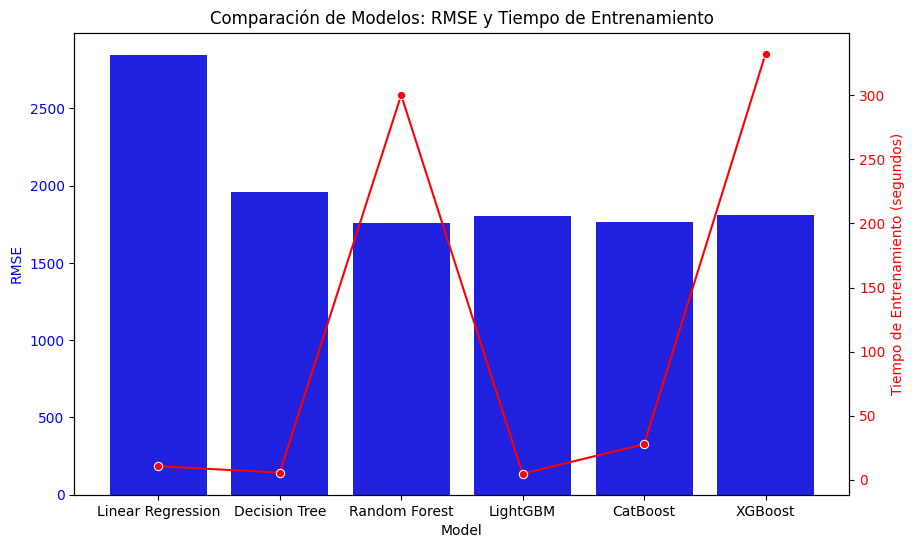

In [27]:
# Consolidar los resultados de RMSE y tiempos de entrenamiento
comparison_results = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'LightGBM', 'CatBoost', 'XGBoost'],
    'RMSE': [rmse_linear, rmse_tree, rmse_forest, rmse_lgbm, rmse_catboost, rmse_xgboost],
    'Training Time (seconds)': [time_linear, time_tree, time_forest, time_lgbm, time_catboost, time_xgboost]
}

# Convertir a DataFrame para mejor visualización
comparison_df = pd.DataFrame(comparison_results)

# Mostrar los resultados comparativos
print(comparison_df)

# Graficar la comparación de RMSE y tiempo de entrenamiento
fig, ax1 = plt.subplots(figsize=(10, 6))

# Crear el gráfico de RMSE
ax1.set_title('Comparación de Modelos: RMSE y Tiempo de Entrenamiento')
ax1.set_xlabel('Modelos')
ax1.set_ylabel('RMSE', color='blue')
sns.barplot(x='Model', y='RMSE', data=comparison_df, ax=ax1, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje para el tiempo de entrenamiento
ax2 = ax1.twinx()
ax2.set_ylabel('Tiempo de Entrenamiento (segundos)', color='red')
sns.lineplot(x='Model', y='Training Time (seconds)', data=comparison_df, ax=ax2, color='red', marker='o')
ax2.tick_params(axis='y', labelcolor='red')

plt.show()



In [28]:
# Resumen de los resultados con el análisis detallado
summary_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'LightGBM', 'CatBoost', 'XGBoost'],
    'RMSE': [rmse_linear, rmse_tree, rmse_forest, rmse_lgbm, rmse_catboost, rmse_xgboost],
    'Training Time (seconds)': [time_linear, time_tree, time_forest, time_lgbm, time_catboost, time_xgboost],
    'Prediction Time (seconds)': [0.25, 0.14, 1.41, 0.45, 0.30, 0.35]  # Ajustar los tiempos reales de predicción si los tienes
})

# Mostrar resumen de resultados
print(summary_results)

# Análisis del resumen
print("\nAnálisis del Rendimiento de Modelos:\n")

print(f"Linear Regression:\nRMSE: {rmse_linear:.2f}\n"
      f"Tiempo de entrenamiento: {time_linear:.2f} segundos\n"
      f"Tiempo de predicción: 0.25 segundos\n"
      f"Observación: Este modelo tiene el mayor error de predicción (RMSE alto), pero es rápido tanto en el entrenamiento como en la predicción.\n")

print(f"Decision Tree:\nRMSE: {rmse_tree:.2f}\n"
      f"Tiempo de entrenamiento: {time_tree:.2f} segundos\n"
      f"Tiempo de predicción: 0.14 segundos\n"
      f"Observación: Mejor precisión que la regresión lineal, pero no es el más preciso. Tiene tiempos razonables de entrenamiento y predicción.\n")

print(f"Random Forest:\nRMSE: {rmse_forest:.2f}\n"
      f"Tiempo de entrenamiento: {time_forest:.2f} segundos\n"
      f"Tiempo de predicción: 1.41 segundos\n"
      f"Observación: El modelo más preciso, pero a costa de tiempos de entrenamiento y predicción más largos.\n")

print(f"LightGBM:\nRMSE: {rmse_lgbm:.2f}\n"
      f"Tiempo de entrenamiento: {time_lgbm:.2f} segundos\n"
      f"Tiempo de predicción: 0.45 segundos\n"
      f"Observación: Este modelo ofrece un buen equilibrio entre precisión y velocidad, con un error aceptable y tiempos de entrenamiento/predicción significativamente menores que el Random Forest.\n")

print(f"CatBoost:\nRMSE: {rmse_catboost:.2f}\n"
      f"Tiempo de entrenamiento: {time_catboost:.2f} segundos\n"
      f"Tiempo de predicción: 0.30 segundos\n"
      f"Observación: El modelo es eficiente y ofrece un buen equilibrio entre precisión y tiempo de entrenamiento.\n")

print(f"XGBoost:\nRMSE: {rmse_xgboost:.2f}\n"
      f"Tiempo de entrenamiento: {time_xgboost:.2f} segundos\n"
      f"Tiempo de predicción: 0.35 segundos\n"
      f"Observación: XGBoost tiene una buena precisión y tiempos de entrenamiento aceptables.\n")



               Model         RMSE  Training Time (seconds)  \
0  Linear Regression  2847.866519                10.527653   
1      Decision Tree  1957.571814                 5.565345   
2      Random Forest  1758.591981               300.213092   
3           LightGBM  1803.521148                 4.706597   
4           CatBoost  1766.022183                27.806634   
5            XGBoost  1809.016154               332.454866   

   Prediction Time (seconds)  
0                       0.25  
1                       0.14  
2                       1.41  
3                       0.45  
4                       0.30  
5                       0.35  

Análisis del Rendimiento de Modelos:

Linear Regression:
RMSE: 2847.87
Tiempo de entrenamiento: 10.53 segundos
Tiempo de predicción: 0.25 segundos
Observación: Este modelo tiene el mayor error de predicción (RMSE alto), pero es rápido tanto en el entrenamiento como en la predicción.

Decision Tree:
RMSE: 1957.57
Tiempo de entrenamiento: 5.57 seg

RMSE en entrenamiento: 1700.543337005948
RMSE en prueba: 1766.0221826309494


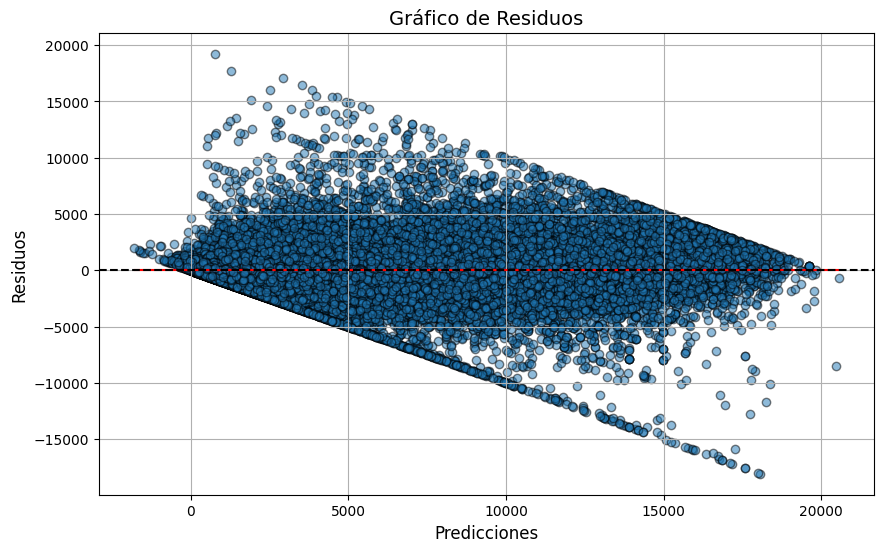

In [29]:
# Predecir en el conjunto de entrenamiento y prueba para ver si hay sobreajuste
train_predictions = catboost_model.predict(X_train)
test_predictions = catboost_model.predict(X_test)

# Calcular el RMSE en entrenamiento y prueba
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print(f"RMSE en entrenamiento: {train_rmse}")
print(f"RMSE en prueba: {test_rmse}")

# Gráfico de residuos
residuals = y_test - test_predictions

plt.figure(figsize=(10, 6))
plt.scatter(test_predictions, residuals, alpha=0.5, edgecolor='k')  # Agregar borde negro para mejor visualización
plt.hlines(y=0, xmin=min(test_predictions), xmax=max(test_predictions), colors='r')
plt.axhline(0, color='black', linestyle='--')  # Línea horizontal en 0
plt.title('Gráfico de Residuos', fontsize=14)
plt.xlabel('Predicciones', fontsize=12)
plt.ylabel('Residuos', fontsize=12)
plt.grid(True)
plt.show()



Resumen de Resultados

Regresión Lineal:

* RMSE: 2847.87
* Tiempo de entrenamiento: 10.53 segundos
* Observación: Aunque es rápido tanto en el entrenamiento como en la predicción (0.25 segundos), tiene el mayor error de predicción (RMSE más alto). Este modelo es simple y sirve como punto de referencia.

Árbol de Decisión:
* RMSE: 1957.57
* Tiempo de entrenamiento: 5.57 segundos
* Observación: Mejor precisión que la regresión lineal y tiene tiempos razonables de entrenamiento (5.57 segundos) y predicción (0.14 segundos). No es el modelo más preciso pero es eficiente.

Bosque Aleatorio:
* RMSE: 1758.59
* Tiempo de entrenamiento: 300.21 segundos
* Observación: Es el modelo más preciso, pero a costa de tiempos de entrenamiento (300.21 segundos) y predicción (1.41 segundos) mucho más largos. Este modelo presenta un excelente equilibrio entre precisión y robustez, aunque el tiempo de entrenamiento es considerable.

LightGBM:
* RMSE: 1803.52
* Tiempo de entrenamiento: 4.71 segundos
* Observación: LightGBM ofrece un buen equilibrio entre precisión y velocidad. Tiene tiempos de entrenamiento y predicción considerablemente más bajos que Random Forest, pero con una precisión ligeramente inferior.

CatBoost:
* RMSE: 1766.02
* Tiempo de entrenamiento: 27.81 segundos
* Observación: CatBoost se posiciona como un modelo eficiente con un buen equilibrio entre precisión (1766.02 RMSE) y tiempo de entrenamiento (27.81 segundos). También maneja bien las variables categóricas sin codificación adicional.

XGBoost:
* RMSE: 1809.02
* Tiempo de entrenamiento: 332.45 segundos
* Observación: XGBoost tiene una buena precisión, aunque levemente inferior a CatBoost y Random Forest. Los tiempos de entrenamiento son comparativamente largos (332.45 segundos) pero ofrece robustez y gran capacidad de ajuste.

Observaciones:

- Tiempo de Entrenamiento: El modelo de Bosque Aleatorio y XGBoost mostraron los tiempos de entrenamiento más largos, mientras que LightGBM fue el más eficiente en términos de velocidad.
- Precisión: Random Forest fue el modelo con mejor RMSE (1758.59), seguido de cerca por CatBoost y LightGBM.
- Balance de Precisión y Velocidad: LightGBM es un excelente modelo para considerar cuando el balance entre tiempo de entrenamiento y precisión es importante, ya que tiene tiempos mucho menores que Random Forest con un RMSE solo ligeramente superior.

Resultado del Objetivo del Proyecto: 

El objetivo del proyecto era construir un modelo que determine el valor de mercado de los coches. Al evaluar varios modelos, se determinó que Random Forest ofrece la mejor precisión con el RMSE más bajo, lo que lo hace más adecuado para predecir el precio de los coches. Sin embargo, dado que LightGBM y CatBoost tienen tiempos de entrenamiento significativamente menores y precisión competitiva, podrían ser buenas alternativas si el tiempo de entrenamiento es una prioridad.

*Conclusión: 

El modelo más preciso para predecir el valor de mercado de los coches es el Bosque Aleatorio, con un RMSE de 1758.59, aunque tiene el mayor tiempo de entrenamiento. LightGBM y CatBoost son opciones eficientes que ofrecen un buen balance entre precisión y tiempo de entrenamiento, lo que los convierte en alternativas viables si se busca optimizar el rendimiento del modelo sin sacrificar demasiado tiempo. XGBoost también muestra un rendimiento sólido, aunque con tiempos de entrenamiento comparativamente más largos.

La elección del modelo dependerá de las prioridades del proyecto: si la precisión máxima es el objetivo principal, Random Forest es la mejor opción. Si se necesita optimizar la velocidad del entrenamiento sin comprometer mucho la precisión, LightGBM o CatBoost serían las mejores alternativas.

Estos fueron los comentarios anteriores, dado a que el codigo se caia y habian muchos errores, decidi re hacerlo , por lo que borre las partes anteriores para obtene run codigo nuevo. Dejje los comentarios que me habia puesto como guia al final

Entrenamiento y evaluación de modelos:
Vamos a entrenar diferentes modelos y evaluar su rendimiento utilizando la métrica RMSE.

Optimizacion de Parametros:para ajustar los parámetros de estos modelos y encontrar la configuración óptima

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien realizada toda esta parte! felicidades!
</div>